In [1]:
import pandas as pd
import numpy as np 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk 
from itertools import chain
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\giorg\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giorg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giorg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
pd.set_option('display.max_colwidth', None)
df = pd.read_csv(r'C:\Users\giorg\vaccination_all_tweets.csv', encoding = 'utf-8-sig')

In [3]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


# Basic Data Exploration

In [4]:
print(f"Data shape: {df.shape}")

Data shape: (65088, 16)


In [5]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,6.508800e+04,6.508800e+04,65088.000000,6.508800e+04,65088.000000,65088.000000
mean,1.371274e+18,1.000430e+05,1310.158309,1.592830e+04,3.069613,13.828909
std,1.012533e+16,8.421101e+05,5938.610980,4.400804e+04,50.382039,205.601147
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.366249e+18,1.150000e+02,148.000000,3.810000e+02,0.000000,0.000000
50%,1.372714e+18,5.550000e+02,411.000000,2.262000e+03,0.000000,1.000000
75%,1.379873e+18,2.485000e+03,1193.000000,1.177375e+04,1.000000,3.000000
max,1.384198e+18,1.502048e+07,516578.000000,1.221784e+06,7695.000000,22815.000000


In [6]:
df.dtypes

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65088 entries, 0 to 65087
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                65088 non-null  int64 
 1   user_name         65088 non-null  object
 2   user_location     50288 non-null  object
 3   user_description  60591 non-null  object
 4   user_created      65088 non-null  object
 5   user_followers    65088 non-null  int64 
 6   user_friends      65088 non-null  int64 
 7   user_favourites   65088 non-null  int64 
 8   user_verified     65088 non-null  bool  
 9   date              65088 non-null  object
 10  text              65088 non-null  object
 11  hashtags          51188 non-null  object
 12  source            64969 non-null  object
 13  retweets          65088 non-null  int64 
 14  favorites         65088 non-null  int64 
 15  is_retweet        65088 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 7.1+ MB


In [8]:
df.isnull().sum()

id                      0
user_name               0
user_location       14800
user_description     4497
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            13900
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [9]:
# Missing values

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

missing_data(df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,0,0,14800,4497,0,0,0,0,0,0,0,13900,119,0,0,0
Percent,0.0,0.0,22.738446,6.909108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.355703,0.182829,0.0,0.0,0.0
Types,int64,object,object,object,object,int64,int64,int64,bool,object,object,object,object,int64,int64,bool


In [10]:
# Unique values

def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

unique_values(df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,65088,65088,50288,60591,65088,65088,65088,65088,65088,65088,65088,51188,64969,65088,65088,65088
Uniques,65088,34925,12156,33718,35504,11738,5938,21429,2,64384,65014,22606,207,279,611,1


In [11]:
# Most frequent values

def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

most_frequent_values(df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,65088,65088,50288,60591,65088,65088,65088,65088,65088,65088,65088,51188,64969,65088,65088,65088
Most frequent item,1377661711302467587,Workout Solutions,India,"George Tsanis – Workout Solutions Health and Fitness Consultants since 1996 – One-on-one and online distance coaching – Toronto, Canada, World",2010-09-20 17:01:08,1202,229,0,False,2021-03-02 23:02:10,BREAKING NEWS : #SputnikV approved for emergency use in India.,['Moderna'],Twitter Web App,0,0,False
Frequence,1,1911,2029,1911,1911,599,655,906,58316,4,6,3793,20138,44230,28100,65088
Percent from total,0.002,2.936,4.035,3.154,2.936,0.92,1.006,1.392,89.596,0.006,0.009,7.41,30.996,67.954,43.172,100.0


C:\Users\giorg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\giorg\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127757 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\giorg\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\giorg\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35799 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\giorg\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20255 missing from current font.
  font.set_te

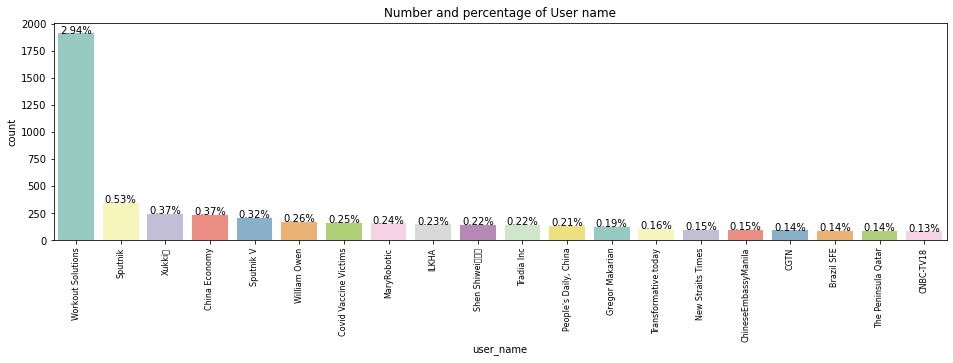

In [12]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()  
    
plot_count("user_name", "User name", df,4)

# Clean the 'text' column

In [13]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

stop = stopwords.words('english')           
stop.extend(['from', 'subject', 're', 'edu', 'use','like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people', 
             'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said',
             'say', '\s', 'mr', 'Mr', 'said', 'says', 'saying', 'today', 'be',
             'one','two', 'three', 'four', 'five','six','seven','eight','nine','ten', 'however',
             'i', 'ii', 'iii','iv','v', 'vii', 'viii', 'ix', 'x', 'xi', 'xii','xiii', 'xiv', 
             'often', 'called', 'new', 'date', 'fully', 'thus', 'new', 'include', 'http',
             'www','doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et',
             'al', 'author', 'figure','rights', 'reserved', 'permission', 'used', 'using'])


df['text'] = df['text'].map(lambda x:  re.sub("@[A-Za-z0-9]+","",x)) # Remove the mentions
df['text'] = df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0]) # Remove the links
df['text'] = df['text'].str.lower()# Turn them into lowercase
df['text'] = df['text'].map(lambda x: re.sub(r"[^\w+( +\w+)*$]", '', x)) # Remove special characters
df['text'] = df['text'].map(lambda x:  re.sub(r'\s{2,}', ' ', x)) # Remove the doubled spaces
df['text'] = df['text'].map(lambda x:  re.sub(r'@\w+', '', x)) # Remove Mentions
df['text'] = df['text'].map(lambda x:  re.sub(r'[^\x00-\x7F]+', ' ', x)) # Remove Unicode
df['text'] = df.text.str.replace("[^\w\s]", "",regex=True) # Remove punctuation
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) # Remove stopwords
df['text'] = df['text'].str.replace('\d+', '',regex=True) # Remove digits

# Most frequent words in tweets

In [14]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [15]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

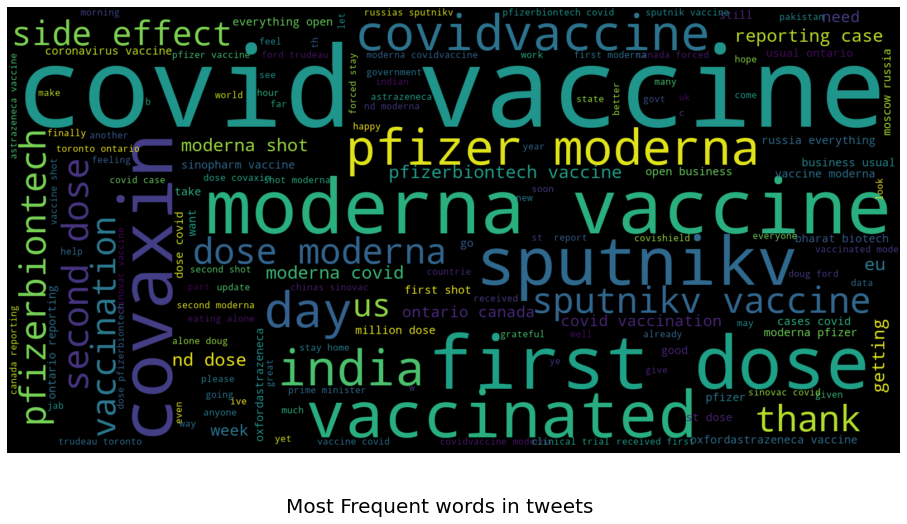

In [16]:
show_wordcloud(df['text'], title = 'Most Frequent words in tweets')

# Sentiment Analysis

In [17]:
sia = SentimentIntensityAnalyzer()

def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

In [18]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

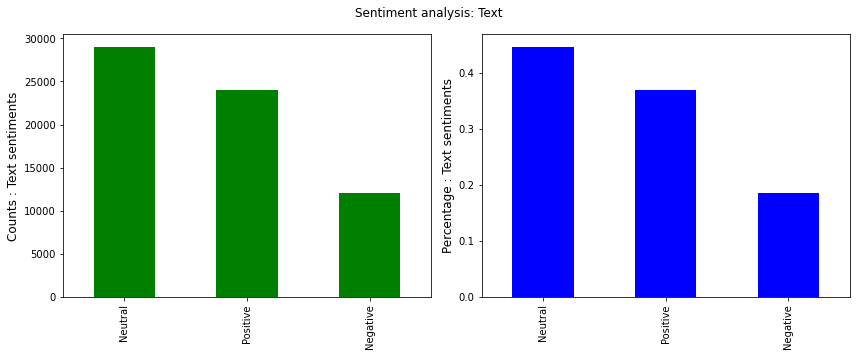

In [19]:
df['sentiment'] = df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'sentiment', 'Text')

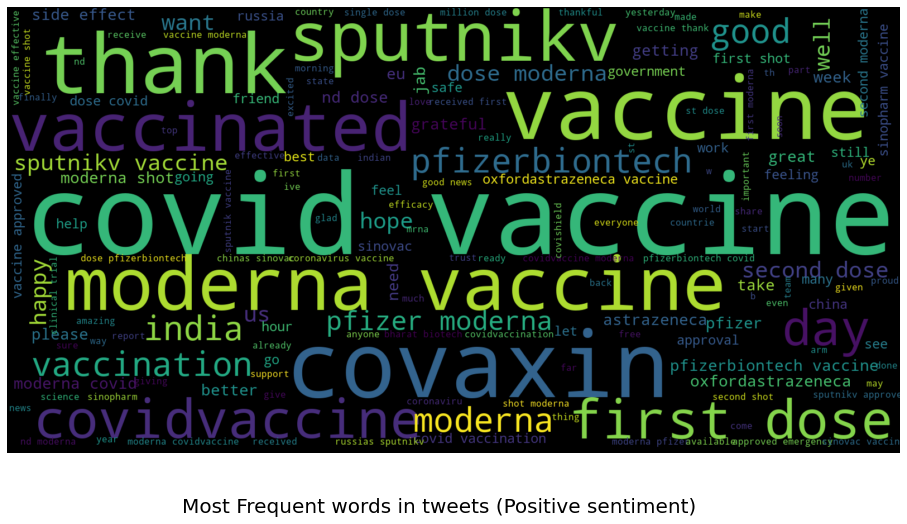

In [20]:
show_wordcloud(df.loc[df['sentiment']=='Positive', 'text'], title = 'Most Frequent words in tweets (Positive sentiment)')

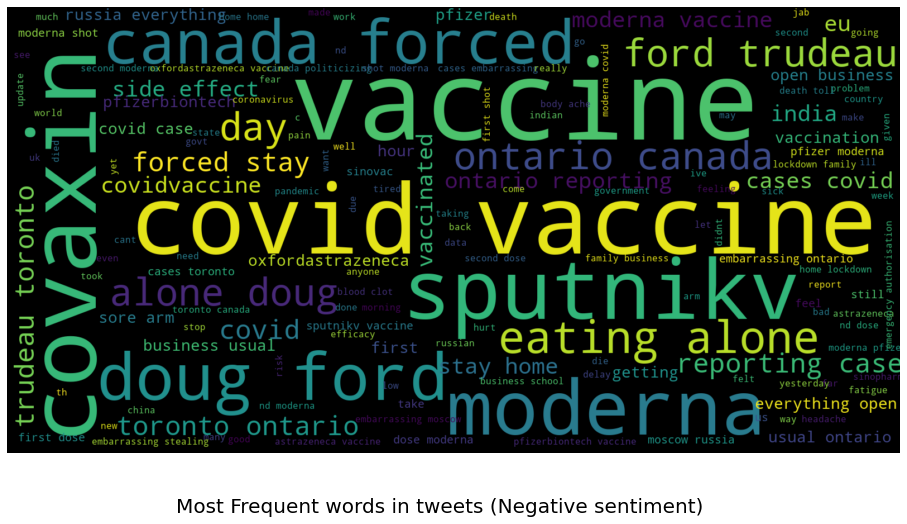

In [21]:
show_wordcloud(df.loc[df['sentiment']=='Negative', 'text'], title = 'Most Frequent words in tweets (Negative sentiment)')

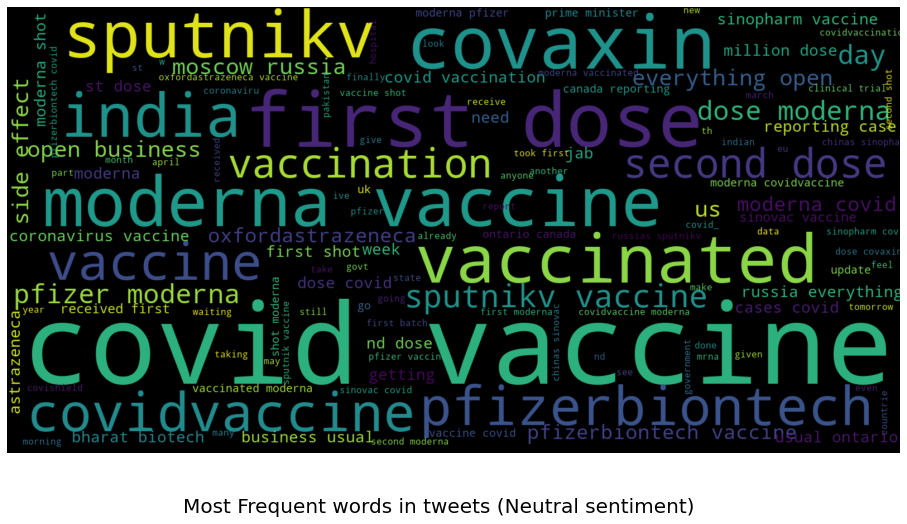

In [22]:
show_wordcloud(df.loc[df['sentiment']=='Neutral', 'text'], title = 'Most Frequent words in tweets (Neutral sentiment)')

In [23]:
text = df['text']

In [24]:
text

0                                                 folks daikon paste could treat cytokine storm pfizerbiontech
1                                   world wrong side history year hopefully biggest vaccination effort weve ev
2           coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_ russian vaccine created last  years
3                                       facts immutable senator even ethically sturdy enough acknowledge  born
4                                                 explain need vaccine whereareallthesickpeople pfizerbiontech
                                                         ...                                                  
65083                                sputnikv gets approval india third vaccine covaxin covishieldcovid corona
65084                              sputnik vaccine approved india rolled dr reddy sputnikv covid vaccine india
65085                                                 sputnikv third vaccine approved india covishield covaxin
6

# Keep only Nouns,  Adjectives and Verbs

In [25]:
from nltk import word_tokenize, pos_tag

# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ' #or pos[:2] == 'VBP'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [26]:
# Apply the nouns function to the transcripts to filter only on nouns
nltk.download('averaged_perceptron_tagger')

text_nouns_adj = pd.DataFrame(text.apply(nouns_adj))
text_nouns_adj

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\giorg\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,text
0,folks paste cytokine storm pfizerbiontech
1,world wrong side history year biggest vaccination effort ev
2,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_ russian vaccine last years
3,facts immutable senator sturdy born
4,need vaccine whereareallthesickpeople pfizerbiontech
...,...
65083,sputnikv approval india third vaccine covaxin covishieldcovid corona
65084,sputnik vaccine india dr reddy sputnikv covid vaccine india
65085,sputnikv third vaccine india covishield covaxin
65086,govt sources recommendation emergency authorisation sputnikv covid vaccinesputnik drlty


# Saving the clean 'text' column

In [27]:
np.savetxt("clean_text.csv", 
           text_nouns_adj,
           delimiter =", ",
           header='text',
           comments='',
           fmt ='% s')